# Project:-1 by Matome Lesley Sebola
# Exploratory Data Analysis (EDA) on a Public Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Titanic-Dataset.csv')
#dataset is obtained from https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let us check if the PassengerId is uniques, this help us to know if there are multiple
records having the same PassengerID

In [4]:
dataset["PassengerId"].is_unique

True

In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.shape

(891, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset["Sex"]=dataset["Sex"].astype("category")

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


In [11]:
# Count NaN values
nan_counts = dataset.isna().sum()
print("NaN counts:")
print(nan_counts)

NaN counts:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Let us deal with age missing values and floating numbers

In [12]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Age'] = dataset['Age'].astype(int)

Cabin information is often associated with the passenger's socioeconomic status 
(as seen in the "Pclass" feature) and their likelihood of survival 
(since passengers in higher decks often had easier access to lifeboats).
Since many passengers do not have cabin data, it’s often helpful to fill the 
missing values with a placeholder like "Unknown."

In [13]:
dataset['Cabin'].fillna('Unknown', inplace=True)

With only 2 missing values in the "Embarked" column out of 891 observations in the Titanic dataset, using the most frequent embarkation point (mode) is a simple and effective method.

In [14]:
# Find the mode (most frequent value) of 'Embarked'
most_common_port = dataset['Embarked'].mode()[0]
# Fill missing values with the mode
dataset['Embarked'].fillna(most_common_port, inplace=True)


In [15]:
# Count NaN values
nan_counts = dataset.isna().sum()
print("NaN counts:")
print(nan_counts)

NaN counts:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


 "Sex" variable should be treated as a categorical variable because it represents distinct categories without any inherent order.

In [16]:
dataset['Sex'] = dataset['Sex'].astype('category')

In [17]:
dataset.duplicated().sum()

0

In [18]:
dataset['name_list'] = dataset.Name.apply(lambda x: x.split(','))
# get the title from the Name
dataset['title'] = dataset.name_list.apply(lambda x: x[1].strip().split(' ')[0])
# get the surname
dataset['surname'] = dataset.name_list.apply(lambda x: x[0])
# first name
dataset['first_name'] = dataset.name_list.apply(lambda x: x[1].strip().split(' ')[1])

In [19]:
dataset.title.value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [20]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_list,title,surname,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,"[Braund, Mr. Owen Harris]",Mr.,Braund,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Mrs.,Cumings,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,"[Heikkinen, Miss. Laina]",Miss.,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Mrs.,Futrelle,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,"[Allen, Mr. William Henry]",Mr.,Allen,William
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S,"[Montvila, Rev. Juozas]",Rev.,Montvila,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Miss.,Graham,Margaret
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,Unknown,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Miss.,Johnston,Catherine
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Mr.,Behr,Karl


# Survival Count

In [21]:
dataset["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Count')

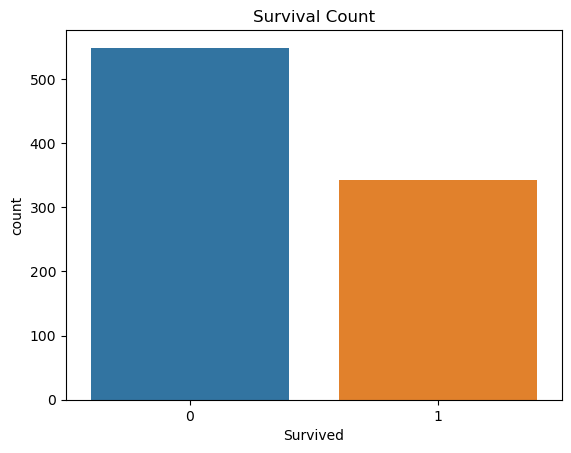

In [22]:
sns.countplot(x="Survived",data=dataset)
plt.title("Survival Count")

# Passanger Class

In [23]:
dataset["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers based on passanger class')

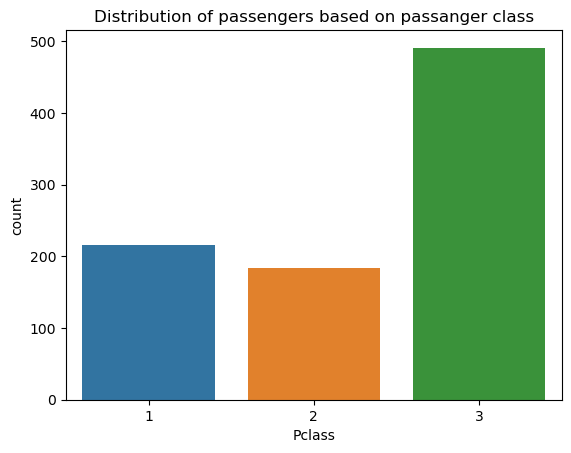

In [24]:
sns.countplot(x="Pclass",data=dataset)
plt.title("Distribution of passengers based on passanger class")

# Distribution of gender

In [25]:
dataset["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers based on their gender')

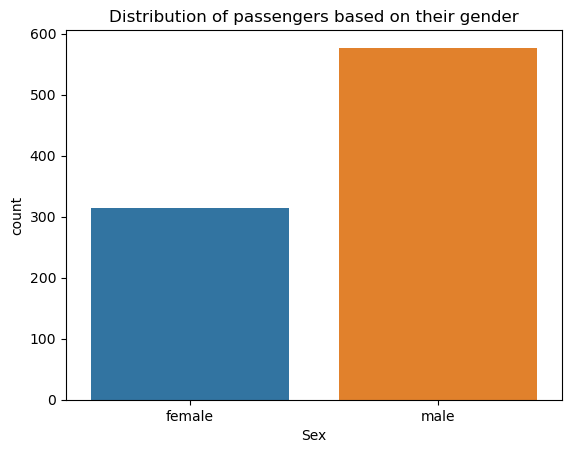

In [26]:
sns.countplot(x="Sex",data=dataset)
plt.title("Distribution of passengers based on their gender")

# Distribution of Embarked

In [27]:
dataset["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of embarked')

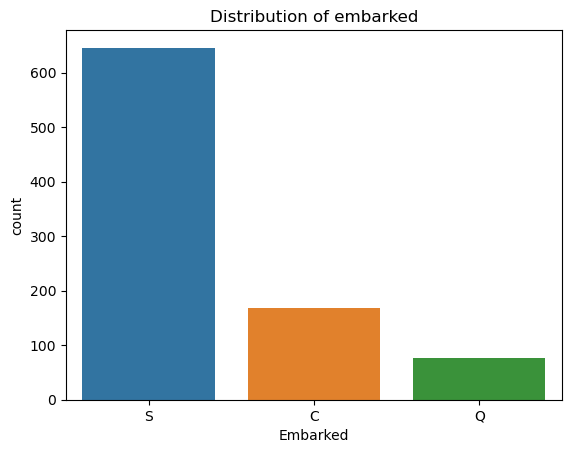

In [28]:
sns.countplot(x="Embarked",data=dataset)
plt.title("Distribution of embarked")

# Passanges grouped by Age Group

In [29]:
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 18, 60, 80], labels=['Child', 'Adult', 'Senior'])
dataset["AgeGroup"].value_counts()

AgeGroup
Adult     730
Child     132
Senior     22
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Passengers based on age group')

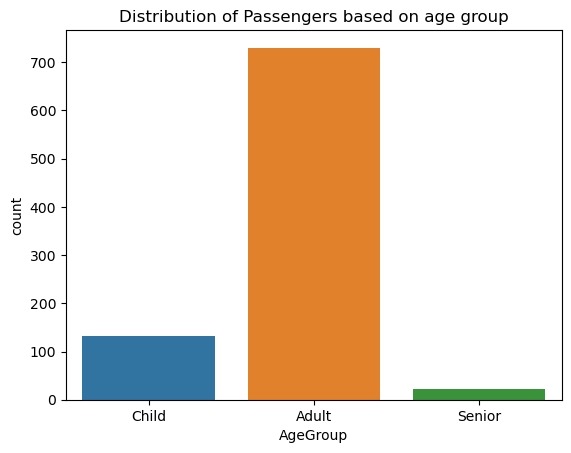

In [30]:
sns.countplot(x='AgeGroup', data=dataset)
plt.title('Distribution of Passengers based on age group')

# Distribution of Age

Text(0.5, 1.0, 'Age Distribution of Passengers')

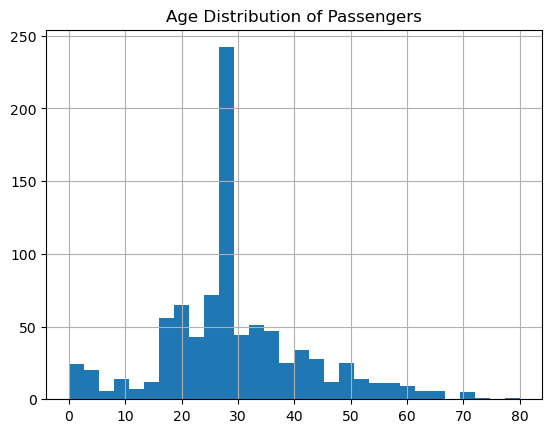

In [31]:
dataset['Age'].hist(bins=30)
plt.title('Age Distribution of Passengers')

Text(0.5, 1.0, 'Age Distribution by Class and Survival')

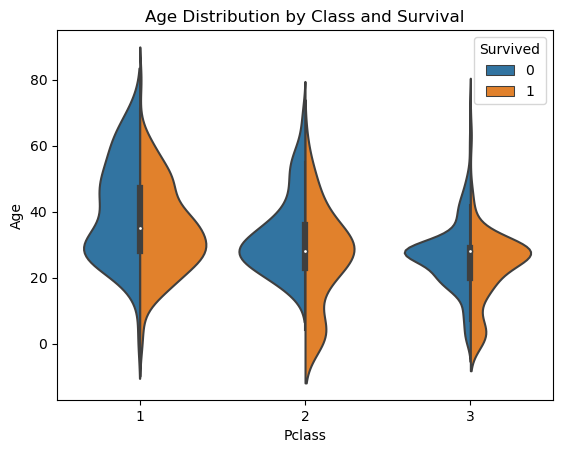

In [32]:
sns.violinplot(x='Pclass', y='Age', data=dataset, hue='Survived', split=True)
plt.title('Age Distribution by Class and Survival')


# Survival rate by Pclass

This plot will show how survival varied based on Pclass (Passenger Class), revealing the correlation between class and survival.

In [33]:
dataset.groupby("Pclass",as_index=False)["Survived"].value_counts()

,Pclass,Survived,count
0,1,1,136
1,1,0,80
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


Text(0.5, 1.0, 'Survival rate by Pclass')

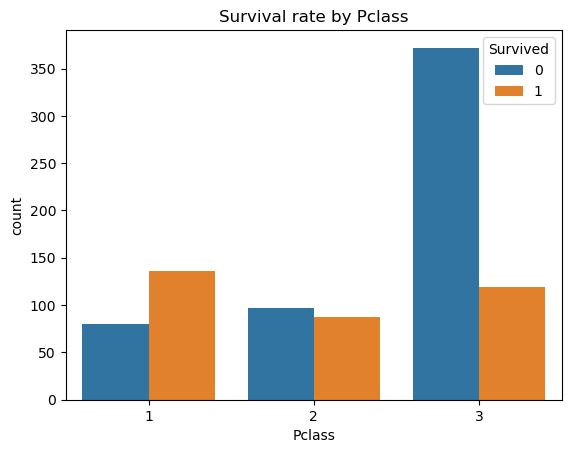

In [34]:
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Survival rate by Pclass')

# Survival Rate by Gender

This highlight the “women and children first” policy that was used during the disaster

In [35]:
dataset.groupby("Sex",as_index=False)["Survived"].value_counts()

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


Text(0.5, 1.0, 'Survival Count of Family')

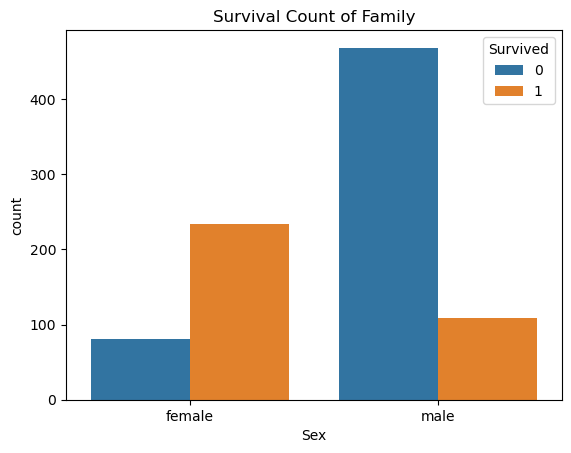

In [36]:
sns.countplot(x='Sex', hue='Survived', data=dataset)
plt.title("Survival Count of Family")

# Survival Rate by Embarkation Port

This plot shows how survival varied based on the Embarked variable (port of embarkation: Southampton, Cherbourg, Queenstown). Passengers who boarded at different ports have had different survival rates, particularly due to differences in socioeconomic status or class.

In [37]:
dataset.groupby("Embarked",as_index=False)["Survived"].value_counts()

,Embarked,Survived,count
0,C,1,93
1,C,0,75
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,219


Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

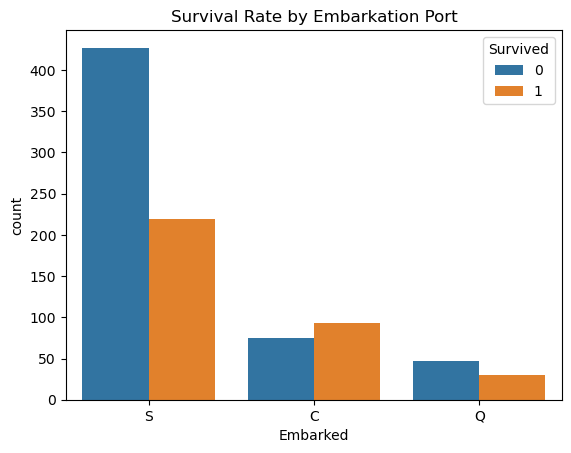

In [38]:
sns.countplot(x='Embarked', hue='Survived', data=dataset)
plt.title("Survival Rate by Embarkation Port")

# Passenger Class Distribution by Gender

This plot will show how Pclass is distributed between men and women. It helps highlight socio-economic differences between genders.

In [39]:
dataset.groupby("Sex",as_index=False)["Pclass"].value_counts()

,Sex,Pclass,count
0,female,3,144
1,female,1,94
2,female,2,76
3,male,3,347
4,male,1,122
5,male,2,108


Text(0.5, 1.0, 'Passenger Class Distribution by Gender')

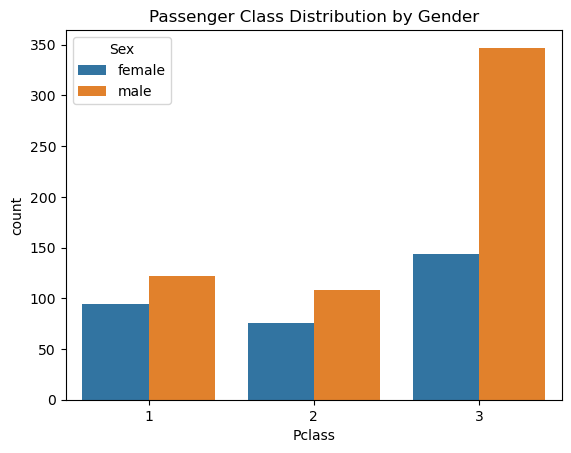

In [40]:
sns.countplot(x='Pclass', hue='Sex', data=dataset)
plt.title("Passenger Class Distribution by Gender")

# Fare Distribution by Passenger Class

First-class passengers paid significantly higher fares, and fare amounts can serve as a proxy for wealth.

In [41]:
passenger_fare=dataset.groupby(["Pclass"],as_index=False)["Fare"].mean()
passenger_fare

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


Text(0.5, 1.0, 'Fare Distribution by Passenger Class')

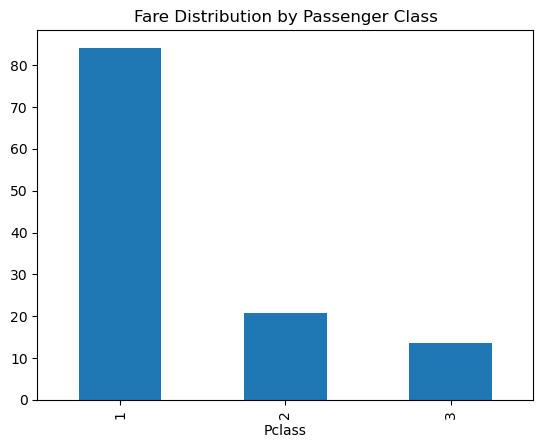

In [42]:
dataset.groupby('Pclass')['Fare'].mean().plot(kind='bar')
plt.title("Fare Distribution by Passenger Class")

# Survival Rate by Age Group and Gender

In [43]:
dataset.groupby("Sex",as_index=False)["AgeGroup"].value_counts()

,Sex,AgeGroup,count
0,female,Adult,243
1,female,Child,66
2,female,Senior,3
3,male,Adult,487
4,male,Child,66
5,male,Senior,19


Text(0.5, 1.0, 'Survival Rate by Age Group and Gender')

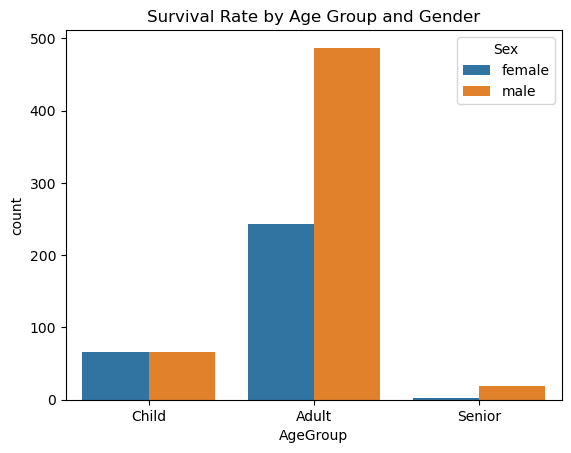

In [44]:
sns.countplot(x='AgeGroup', hue='Sex', data=dataset)
plt.title("Survival Rate by Age Group and Gender")

# Passengers Survived according to their sex and Pclass

In [45]:
passengers_survived=dataset[dataset["Survived"]==1].groupby(["Pclass","Sex"],as_index=False)["Survived"].value_counts()
passengers_survived

,Pclass,Sex,Survived,count
0,1,female,1,91
1,1,male,1,45
2,2,female,1,70
3,2,male,1,17
4,3,female,1,72
5,3,male,1,47


Text(0.5, 1.0, 'Passengers Survived according to their sex and Pclass')

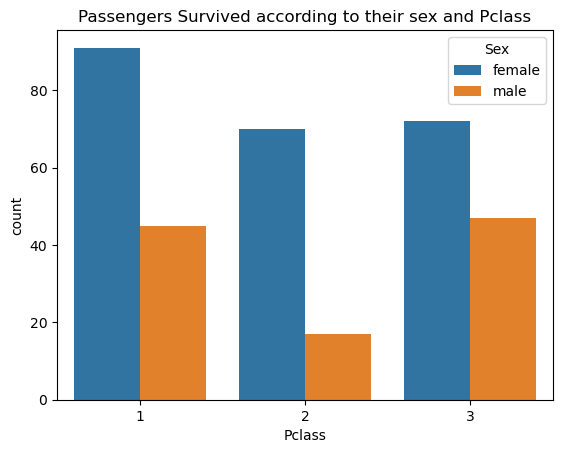

In [46]:
sns.barplot(data=passengers_survived,x="Pclass",y="count",hue="Sex")
plt.title("Passengers Survived according to their sex and Pclass")

# Passengers Dead according to their Pclass and Sex

In [47]:
passengers_dead=dataset[dataset["Survived"]==0].groupby(["Pclass","Sex"],as_index=False)["Survived"].value_counts()
passengers_dead

,Pclass,Sex,Survived,count
0,1,female,0,3
1,1,male,0,77
2,2,female,0,6
3,2,male,0,91
4,3,female,0,72
5,3,male,0,300


Text(0.5, 1.0, 'Passengers Dead according to their Pclass and Sex')

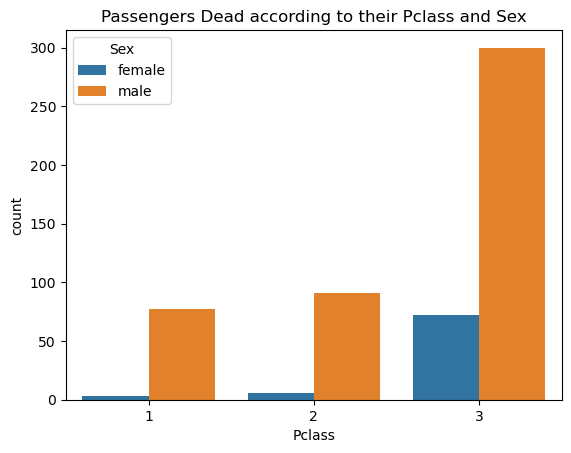

In [48]:
sns.barplot(data=passengers_dead,x="Pclass",y="count",hue="Sex")
plt.title("Passengers Dead according to their Pclass and Sex")

# survival_pclass_sexcount

In [49]:
survival_pclass_sexcount=dataset[dataset["Survived"]==1].groupby(["Pclass","Sex"],as_index=False)[["Survived"]].count()
survival_pclass_sexcount

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


Text(0.5, 1.0, 'survival_pclass_sexcount')

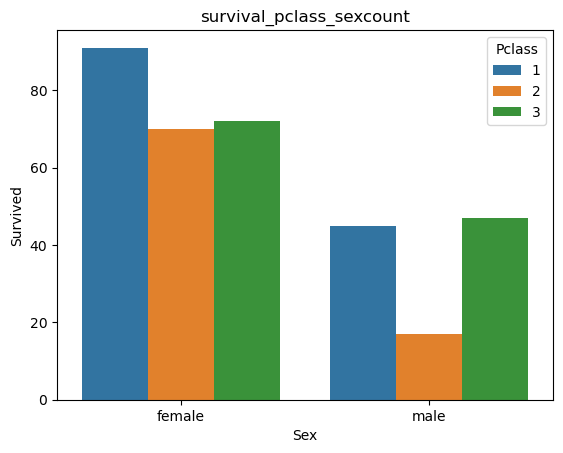

In [50]:
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=survival_pclass_sexcount)
plt.title("survival_pclass_sexcount")

# death_pclass_sexcount

In [51]:
death_pclass_sexcount=dataset[dataset["Survived"]==0].groupby(["Pclass","Sex"],as_index=False)[["Survived"]].count()
death_pclass_sexcount.columns=["Pclass","Sex","Dead"]
death_pclass_sexcount

,Pclass,Sex,Dead
0,1,female,3
1,1,male,77
2,2,female,6
3,2,male,91
4,3,female,72
5,3,male,300


Text(0.5, 1.0, 'death_pclass_sexcount')

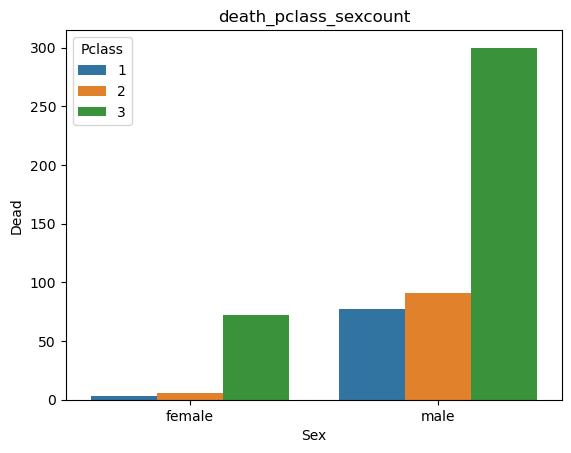

In [52]:
sns.barplot(x="Sex",y="Dead",hue="Pclass",data=death_pclass_sexcount)
plt.title("death_pclass_sexcount")

# Age Distribution by Class and Survival

This can be particularly useful to show the distribution of age across classes or gender and highlight where the data is concentrated.

Text(0.5, 1.0, 'Age Distribution by Class and Survival')

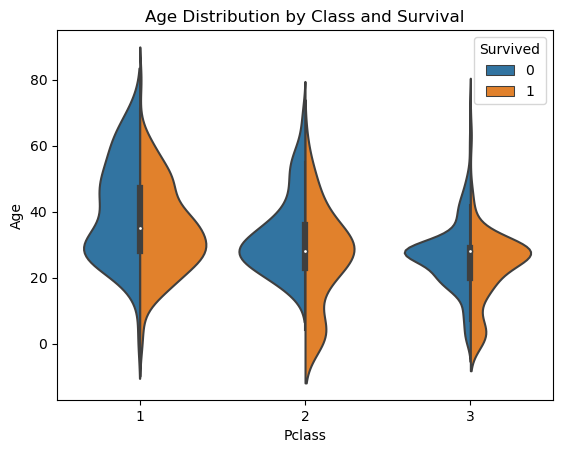

In [53]:
sns.violinplot(x='Pclass', y='Age', data=dataset, hue='Survived', split=True)
plt.title('Age Distribution by Class and Survival')


# Age Distribution by Survival

This plot is ideal for comparing the distribution of Age across survival status, providing insight into whether certain groups (e.g., younger passengers) had higher survival rates.

Text(0.5, 1.0, 'Age Distribution by Survival')

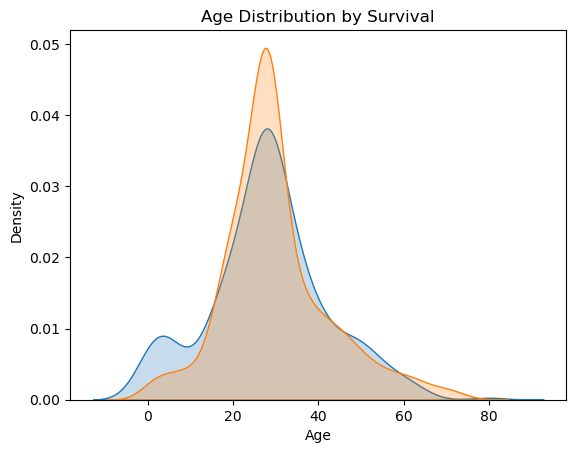

In [54]:
sns.kdeplot(dataset['Age'][dataset['Survived'] == 1], fill=True, label='Survived')
sns.kdeplot(dataset['Age'][dataset['Survived'] == 0], fill=True, label='Did Not Survive')
plt.title('Age Distribution by Survival')

# Survival by Passenger Class, Gender, and Embarkation Port

This combination will show if men and women from different classes and embarkation points had different survival rates.

C:\Users\matom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


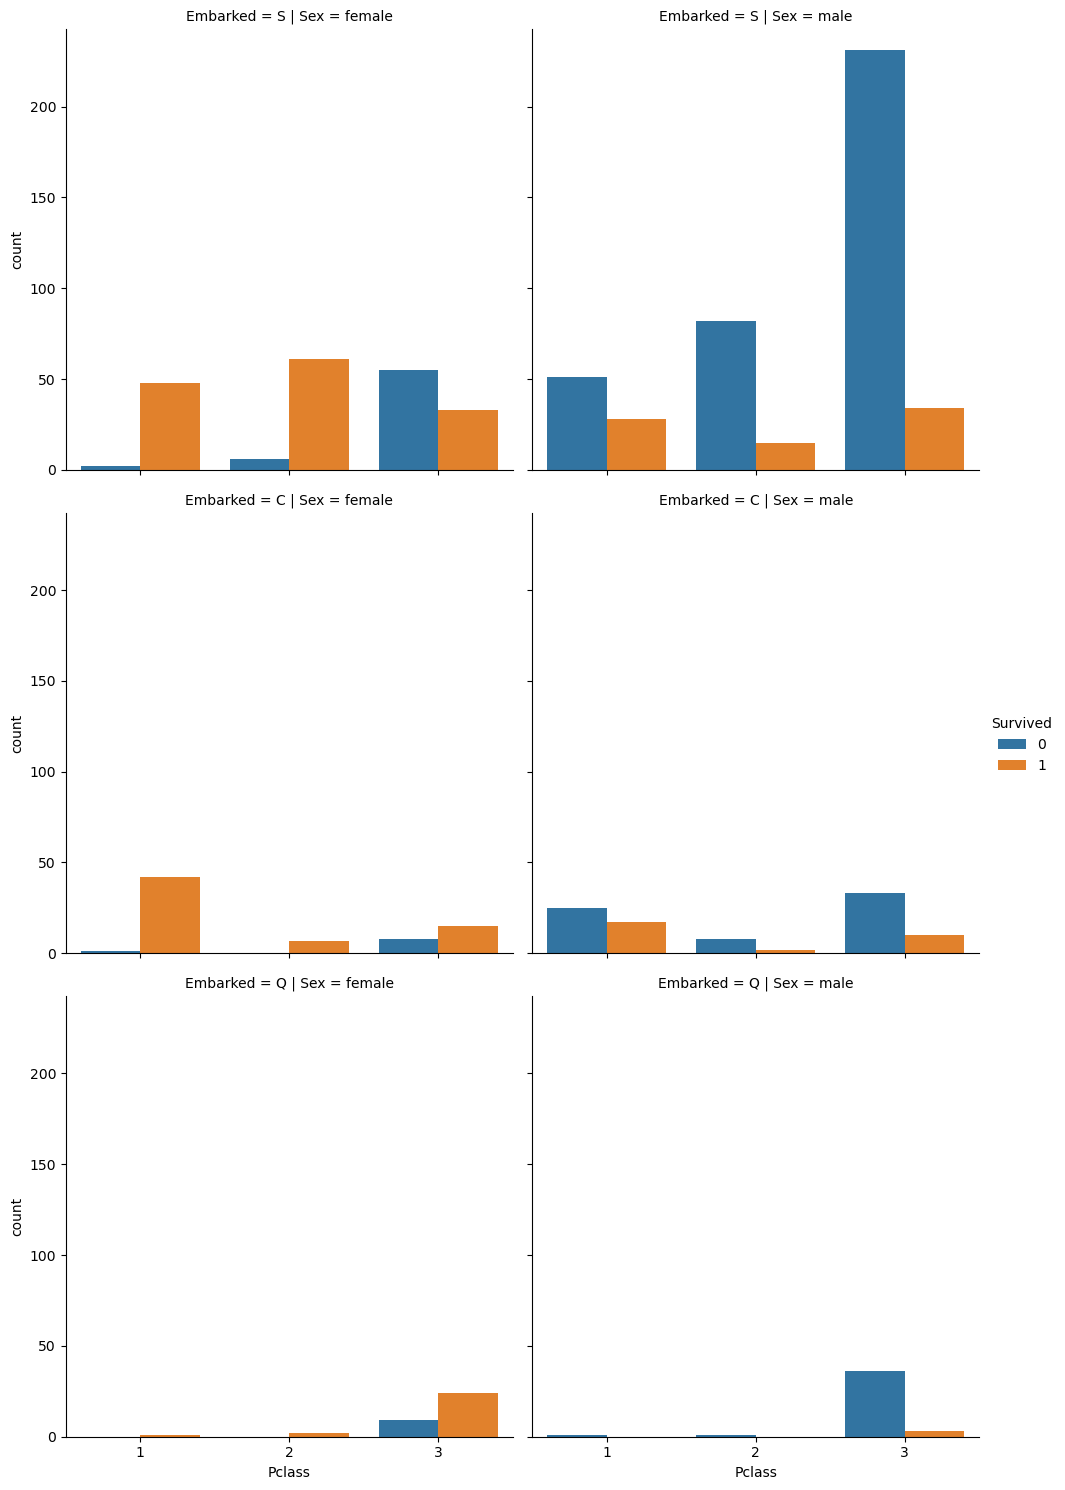

In [55]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', row='Embarked', kind='count', data=dataset)

# Survival by Fare and Passenger Class

Wealthier passengers (with higher fares) in higher classes may have had better survival chances.

In [56]:
dataset['FareBin'] = pd.cut(dataset['Fare'], bins=[0, 50, 100, 200, 600], labels=['Low', 'Medium', 'High', 'Very High'])
farebin_survival_counts = dataset.groupby(['FareBin', 'Survived']).size().unstack()
print(farebin_survival_counts)

Survived     0    1
FareBin            
Low        484  232
Medium      37   70
High         8   25
Very High    6   14


Text(0.5, 1.0, 'Survival by Fare and Passenger Class')

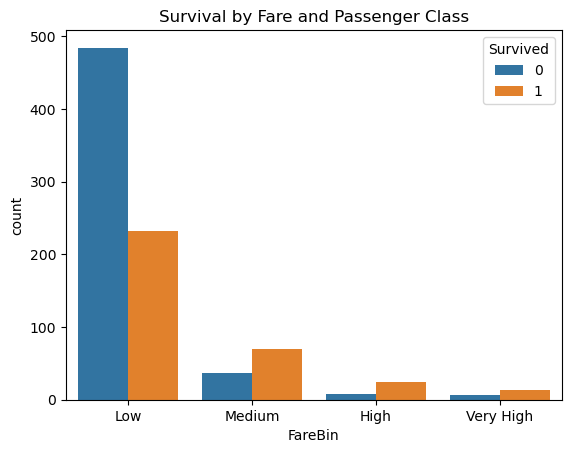

In [57]:
sns.countplot(x='FareBin', hue='Survived', data=dataset)
plt.title("Survival by Fare and Passenger Class")

# Survival by Age, Gender, and Class

This will emphasize how age, gender, and class together affected survival, e.g., first-class children likely had higher survival rates than third-class adults.

C:\Users\matom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


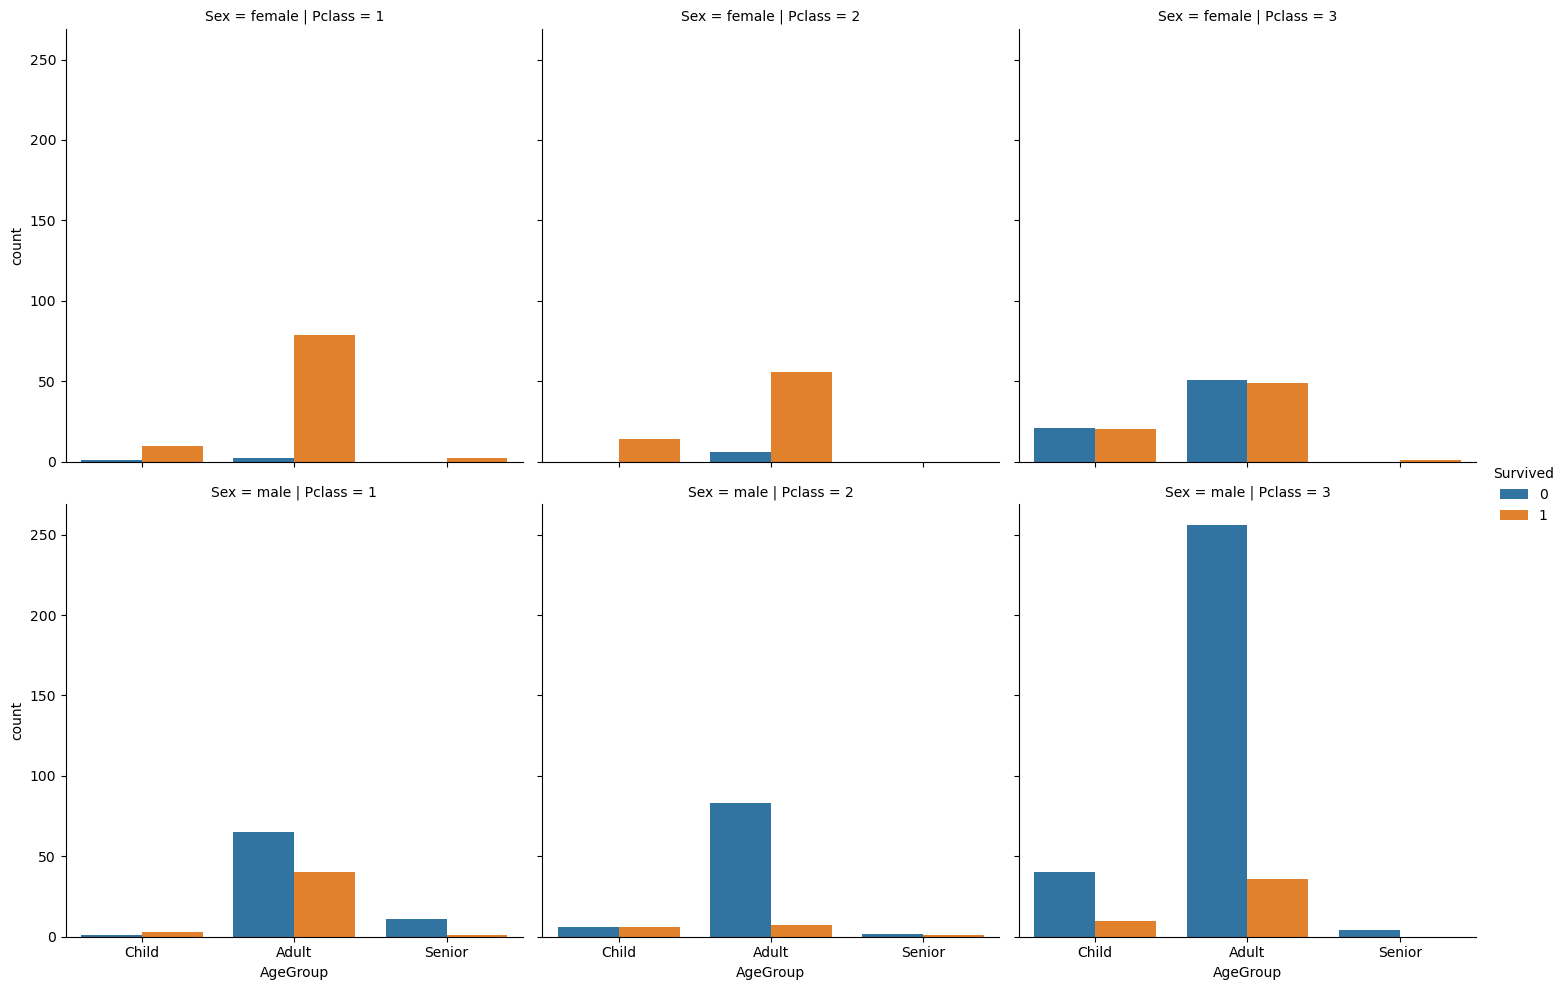

In [58]:
sns.catplot(x='AgeGroup', hue='Survived', col='Pclass', row='Sex', kind='count', data=dataset)

# Family Size (SibSp + Parch) vs. Survival

This will show if family size influenced survival. For example, larger families might have had a harder time escaping, while smaller families might have survived more easily.

Text(0.5, 1.0, 'Family Size (SibSp + Parch) vs. Survival')

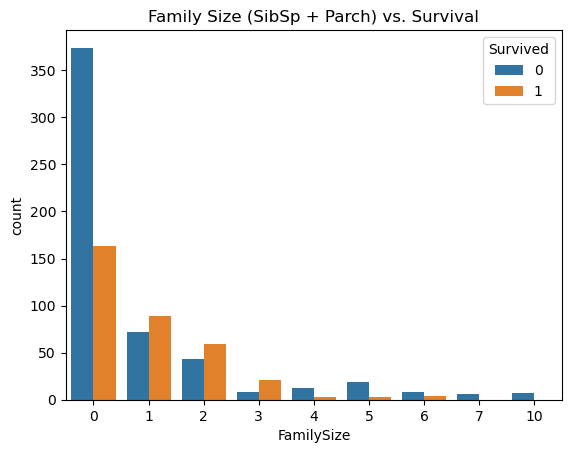

In [59]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
sns.countplot(x='FamilySize', hue='Survived', data=dataset)
plt.title("Family Size (SibSp + Parch) vs. Survival")

# Embarkation, Class, and Fare

This can reveal if passengers from certain ports paid more fares and belonged to higher classes.

C:\Users\matom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


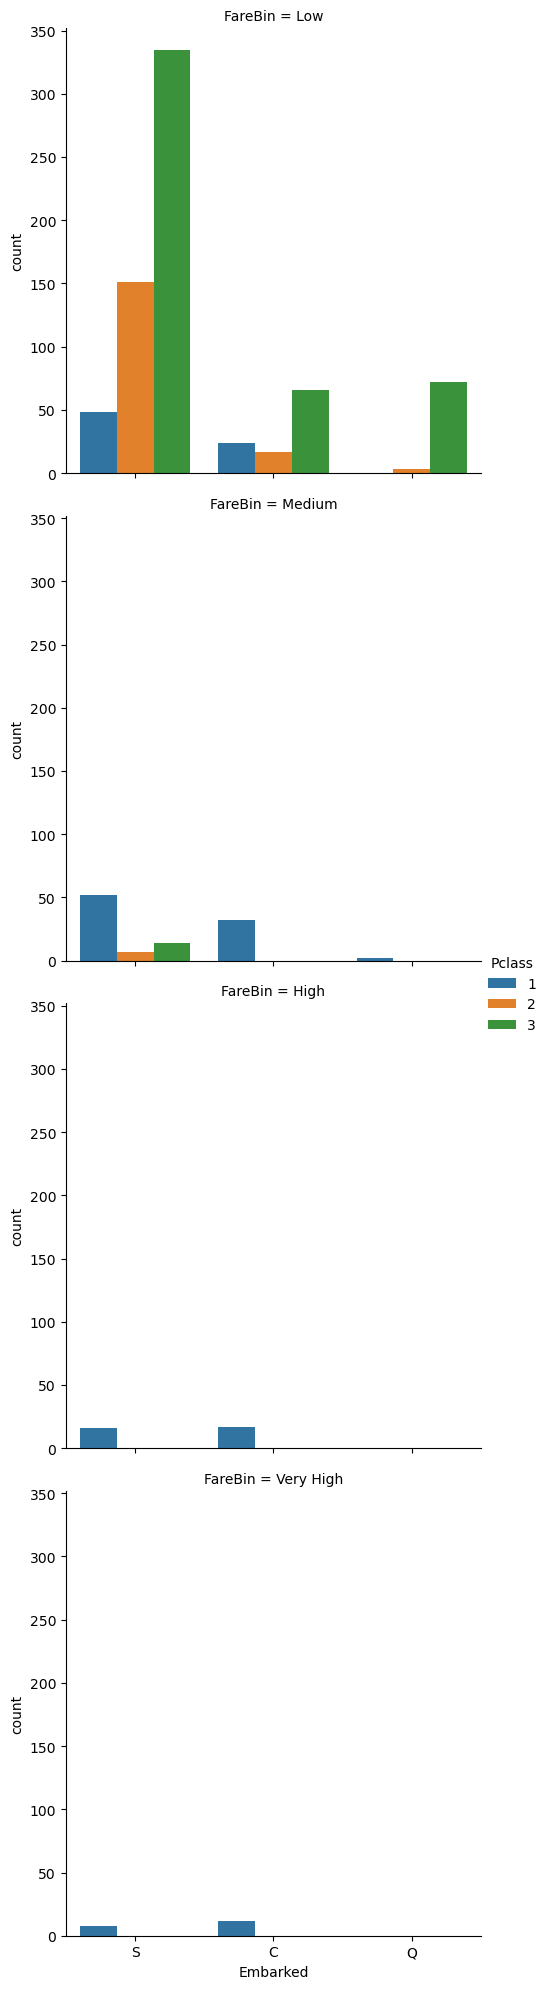

In [60]:
sns.catplot(x='Embarked', hue='Pclass', row='FareBin', kind='count', data=dataset)

# Class, Embarked, and Family Size vs. Survival

Larger families might have been more vulnerable, and certain ports might have had passengers with larger families.

C:\Users\matom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


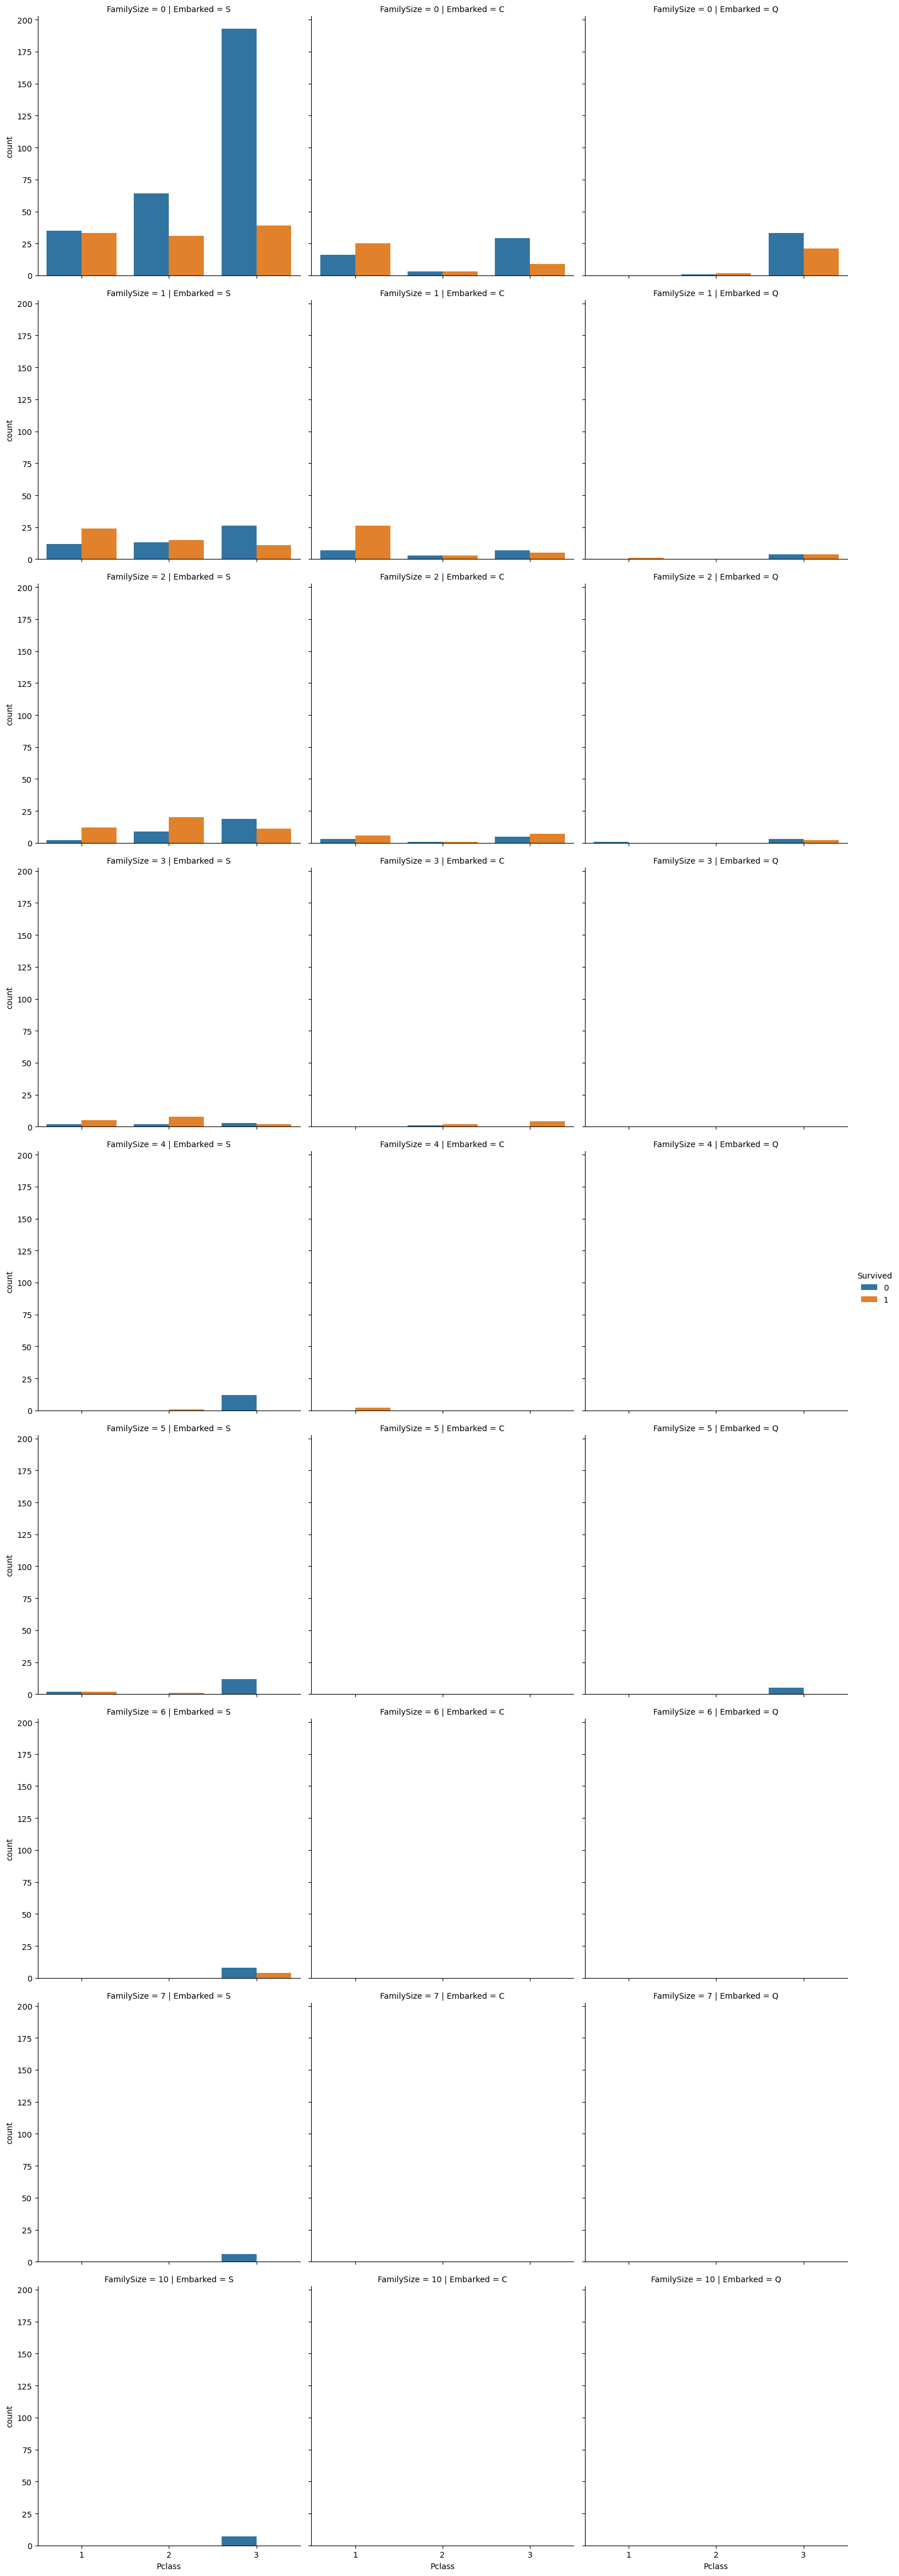

In [61]:
sns.catplot(x='Pclass', hue='Survived', col='Embarked', row='FamilySize', kind='count', data=dataset)

In [62]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_list,title,surname,first_name,AgeGroup,FareBin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,"[Braund, Mr. Owen Harris]",Mr.,Braund,Owen,Adult,Low,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Mrs.,Cumings,John,Adult,Medium,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,"[Heikkinen, Miss. Laina]",Miss.,Heikkinen,Laina,Adult,Low,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Mrs.,Futrelle,Jacques,Adult,Medium,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,"[Allen, Mr. William Henry]",Mr.,Allen,William,Adult,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S,"[Montvila, Rev. Juozas]",Rev.,Montvila,Juozas,Adult,Low,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Miss.,Graham,Margaret,Adult,Low,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,Unknown,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Miss.,Johnston,Catherine,Adult,Low,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Mr.,Behr,Karl,Adult,Low,0
